In [46]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from keras import regularizers


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 199us/step - loss: 0.5098 - acc: 0.7804 - val_loss: 0.3825 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.3012 - acc: 0.9039 - val_loss: 0.2994 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2161 - acc: 0.9287 - val_loss: 0.3079 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1728 - acc: 0.9436 - val_loss: 0.2836 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1395 - acc: 0.9552 - val_loss: 0.2854 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1119 - acc: 0.9658 - val_loss: 0.3103 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0943 - acc: 0.9721 - val_loss: 0

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

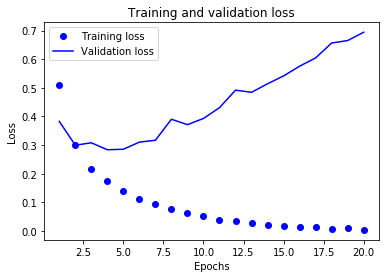

In [13]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

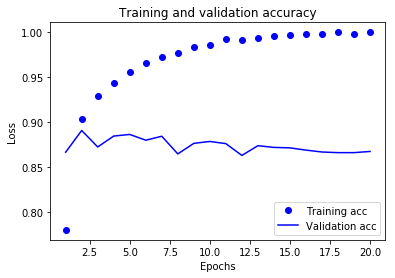

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.4910 - acc: 0.7973 - val_loss: 0.3778 - val_acc: 0.8711
Epoch 2/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.3049 - acc: 0.9035 - val_loss: 0.3296 - val_acc: 0.8736
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2363 - acc: 0.9279 - val_loss: 0.2866 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1927 - acc: 0.9413 - val_loss: 0.2771 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1652 - acc: 0.9499 - val_loss: 0.2767 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.1411 - acc: 0.9581 - val_loss: 0.2874 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1233 - acc: 0.9663 - val_loss: 0.2840 - 

In [51]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.6624 - acc: 0.6862 - val_loss: 0.5015 - val_acc: 0.8523
Epoch 2/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.4789 - acc: 0.8379 - val_loss: 0.4063 - val_acc: 0.8587
Epoch 3/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.3931 - acc: 0.8797 - val_loss: 0.3542 - val_acc: 0.8847
Epoch 4/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.3351 - acc: 0.9058 - val_loss: 0.3380 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.2990 - acc: 0.9183 - val_loss: 0.3480 - val_acc: 0.8820
Epoch 6/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.2691 - acc: 0.9312 - val_loss: 0.3550 - val_acc: 0.8838
Epoch 

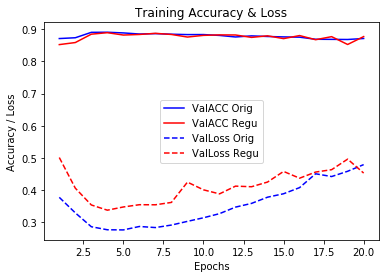

In [52]:
history_dict1 = history1.history
history_dict1.keys()
history_dict2 = history2.history
history_dict2.keys()


plt.clf()   # clear figure
acc_values1 = history_dict1['val_acc']
acc_values2 = history_dict2['val_acc']
loss_values1 = history_dict1['val_loss']
loss_values2 = history_dict2['val_loss']



epochs = range(1, len(acc_values1) + 1)


plt.plot(epochs, acc_values1, 'b', label='ValACC Orig')
plt.plot(epochs, acc_values2, 'r', label='ValACC Regu')
plt.plot(epochs, loss_values1, 'b--', label='ValLoss Orig')
plt.plot(epochs, loss_values2, 'r--', label='ValLoss Regu')

plt.title('Training Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.show()